In [1]:
library(tidyr)
library(tidyverse)
library(dplyr)
library(lubridate)

Warning message:
“As of rlang 0.4.0, dplyr must be at least version 0.8.0.
* dplyr 0.7.6 is too old for rlang 0.4.5.
* Please update dplyr with `install.packages("dplyr")` and restart R.”
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ ggplot2 3.0.0     ✔ forcats 0.3.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




In [2]:
data <- read.table("PROJECT_training2005/ufz_qc_challenge/00_data.csv",skip=1)
names <- as.character(read.table("PROJECT_training2005/ufz_qc_challenge/00_data.csv",nrow=1,stringsAsFactors = FALSE))

In [3]:
coordinates <- read.table("PROJECT_training2005/ufz_qc_challenge/00_coordinates_start_end.csv",sep=",",stringsAsFactors = FALSE,header=TRUE) %>%
    mutate(End = ifelse(End == "", "2020-11-06", End))

#coordinates
coordinates$Start <- as.POSIXct(coordinates$Start)
coordinates$End <- as.POSIXct(coordinates$End)
coordinates_f <- coordinates %>%
    mutate(Box = 1:n()) %>%
    mutate(time_installed = time_length(difftime(End,Start),unit="years")) %>%
    filter(time_installed > 5)

#define two placeholder names
names <- gsub("[^[:alnum:]]", "_", names)
colnames(data) <- c(names,"ex1","ex2")

#clean data 
data_c <- data %>%
    select(-Time) %>%
    unite(Time, c("Box", "Date_Time"),sep = " ")

colnames(data_c) <- names
data_c$Time <- as.POSIXct(as.character(data_c$Date_Time))

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”
Warning message:
“`lang()` is deprecated as of rlang 0.2.0.
Please use `call2()` instead.
This warning is displayed once per session.”
Warning message:
“`new_overscope()` is deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead.
This warning is displayed once per session.”
Warning message:
“`overscope_eval_next()` is deprecated as of rlang 0.2.0.
Please use `eval_tidy()` with a data mask instead.
This warning is displayed once per session.”


In [5]:
#glimpse(data_c)
#glimpse(coordinates_f)

In [4]:
data_c <- data_c %>%
    inner_join(coordinates_f, by="Box")

Warning message:
“`chr_along()` is deprecated as of rlang 0.2.0.
This warning is displayed once per session.”


In [6]:
#glimpse(data_c)

In [7]:
#filter out unrealistic values
#data_cf <- data_c %>%
#    filter(starts_with("SM") < 60)

Warning message:
“Removed 102131 rows containing missing values (geom_path).”
Warning message:
“Removed 102131 rows containing missing values (geom_path).”


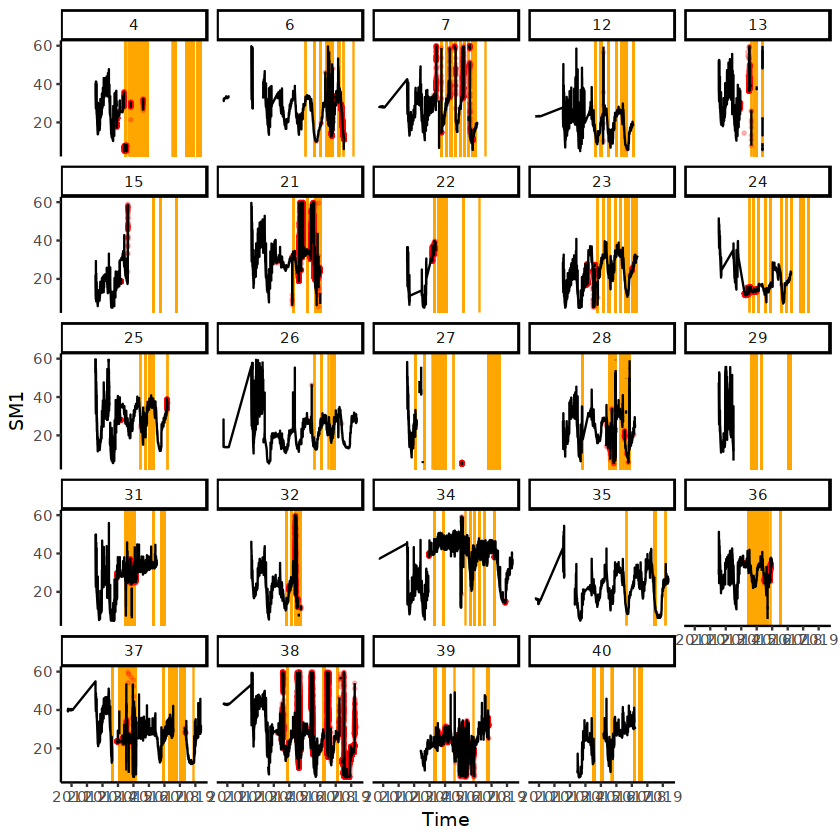

In [41]:
#plot for all years
ggplot(data_c,aes(x=Time, y=SM1))+
    geom_vline(data=filter(data_c, BattV < 2800),aes(xintercept=Time), color="orange")+
    geom_point(data=filter(data_c, SM1_Flag == "Manual"),aes(x=Time, y=SM1),color="red",size=0.5, alpha=0.25)+
    geom_path()+
    scale_x_datetime(breaks="1 year",date_labels = "%Y")+
    scale_y_continuous(limits = c(5,60))+
    facet_wrap(vars(Box),ncol=5)+
    theme_classic()+
    ggsave("overview_allyears_SM1.png", width=25, height=10)

In [5]:
#select specific years
data_cf <- data_c %>%
    filter(Time >= as.Date('2013-01-01') & Time < as.Date('2015-01-01'))

In [24]:
#plot for specific years
plot_sensor1 <- ggplot(data_cf,aes(x=Time, y=SM1))+
    geom_vline(data=filter(data_cf, BattV < 2800),aes(xintercept=Time), color="orange")+
    geom_point(data=filter(data_cf, SM1_Flag == "Manual"),aes(x=Time, y=SM1),color="red",size=0.5, alpha=0.25)+
    geom_path()+
    scale_x_datetime(breaks="1 year",date_labels = "%Y")+
    scale_y_continuous(limits = c(5,60))+
    facet_wrap(vars(Box),ncol=5)+
    theme_classic()+
    ggsave("overview_2years_SM1.png", width=25, height=10)

Warning message:
“Removed 14628 rows containing missing values (geom_path).”


In [11]:
data_cfr <- data_cf %>%
    select(Time, Coord_X, Coord_Y,Box, SM1,SM2,SM3,SM4,SM5,SM6) %>%
    gather("sensor", "value", "SM1","SM2","SM3","SM4","SM5","SM6")



Observations: 1,366,505
Variables: 39
$ Time           <dttm> 2013-01-01 00:10:56, 2013-01-01 00:25:05, 2013-01-0...
$ Box            <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...
$ Date_Time      <fct> 2013-01-01 00:10:56, 2013-01-01 00:25:05, 2013-01-01...
$ SM1            <dbl> 27.9924, 27.9924, 27.9973, 27.9420, 27.9420, 28.0428...
$ SM1_Flag       <fct> OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, ...
$ Temp1          <dbl> 4.9720, 4.9720, 5.0416, 4.9720, 4.9720, 4.9720, 5.07...
$ Temp1_Flag     <fct> OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, ...
$ SM2            <dbl> 28.7191, 28.6668, 28.6668, 28.7165, 28.7165, 28.6719...
$ SM2_Flag       <fct> OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, ...
$ Temp2          <dbl> 4.9025, 4.8677, 4.8677, 4.8677, 4.8677, 4.9373, 4.86...
$ Temp2_Flag     <fct> OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, OK, ...
$ SM3            <dbl> 32.2487, 32.2573, 32.2573, 32.2573, 32.2602, 32.2602...
$ SM3_Flag    

In [ ]:
plot_allsensors <- ggplot(data_cfr, aes(Time, value, group=sensor,color=sensor))+
    geom_path()+
    scale_x_datetime(breaks="1 year",date_labels = "%Y")+
    scale_y_continuous(limits = c(5,60))+
    facet_wrap(vars(Box),ncol=5)+
    theme_classic()+
    ggsave("overview_2years_allSMs.png", width=25, height=10)

Warning message:
“Removed 85033 rows containing missing values (geom_path).”


Warning message:
“Removed 14628 rows containing missing values (geom_path).”


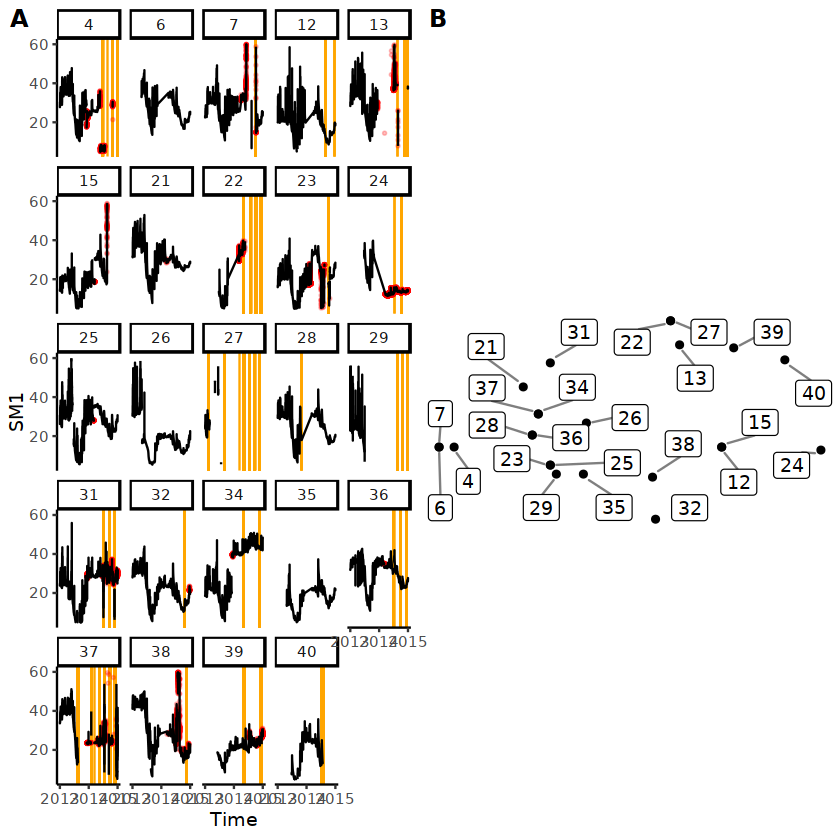

In [34]:
library(ggrepel)
library(cowplot)

plot_locations <- data_cfr %>%
    group_by(Box,Coord_X, Coord_Y) %>%
    summarise() %>%
    ggplot(., aes(x=Coord_X,y=Coord_Y))+
        geom_point()+
        geom_label_repel(aes(label = Box),
                  box.padding   = 0.35, 
                  point.padding = 0.5,
                  segment.color = 'grey50') +
        coord_equal()+
        theme_void()

plot_grid(plot_sensor1, plot_locations, labels = c('A', 'B'))+
  ggsave("overview_2years_SM1_withpositions.png", width=12.5, height=5)


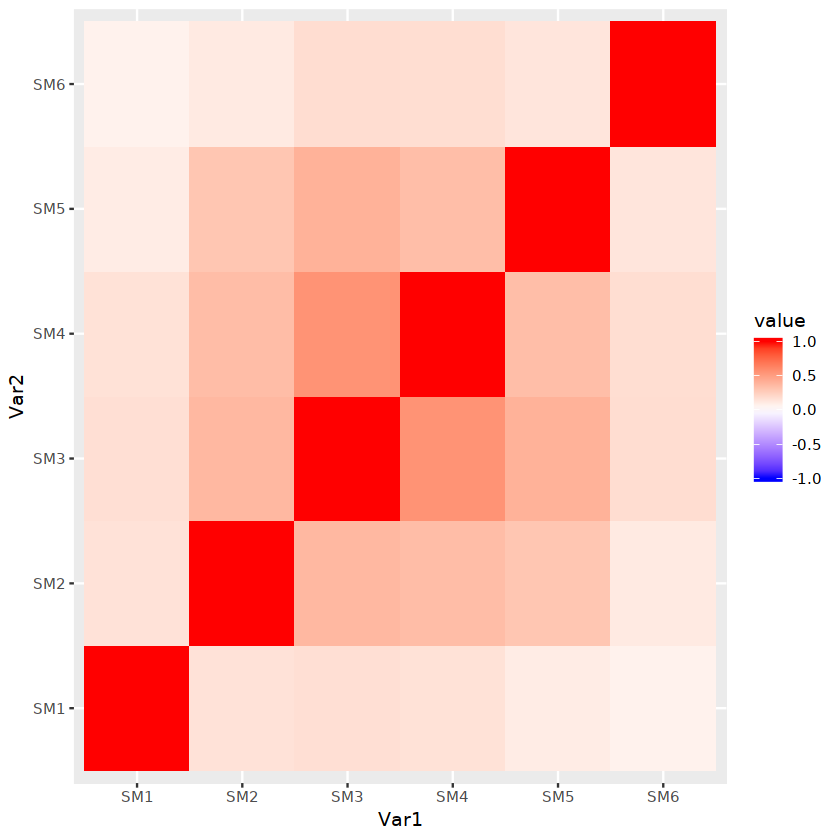

In [17]:
library(reshape2)

data_cfc <- data_cf %>%
    select(Time,Box, SM1,SM2,SM3,SM4,SM5,SM6) %>%
    mutate(ID = paste0(Box,"_",Time)) %>%
    select(-c(Time, Box)) %>%
    column_to_rownames(var = "ID") %>%
    na.omit() %>%
    cor()


data_cfcm <- melt(data_cfc)

ggplot(data = data_cfcm, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
  midpoint = 0.5, limit = c(0,1), space = "Lab")+
  ggsave("correlation_Sens", width=12.5, height=5)

In [ ]:
ggplot(data_c, aes(x=BattV))+
    geom_histogram(color="black", fill="white",bindiwth=100)+
    theme_classic()+
    ggsave("histo.png", width=10, height=10)